<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/06-14/litao3_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [4]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

fatal: destination path 'gator' already exists and is not an empty directory.


'/content'

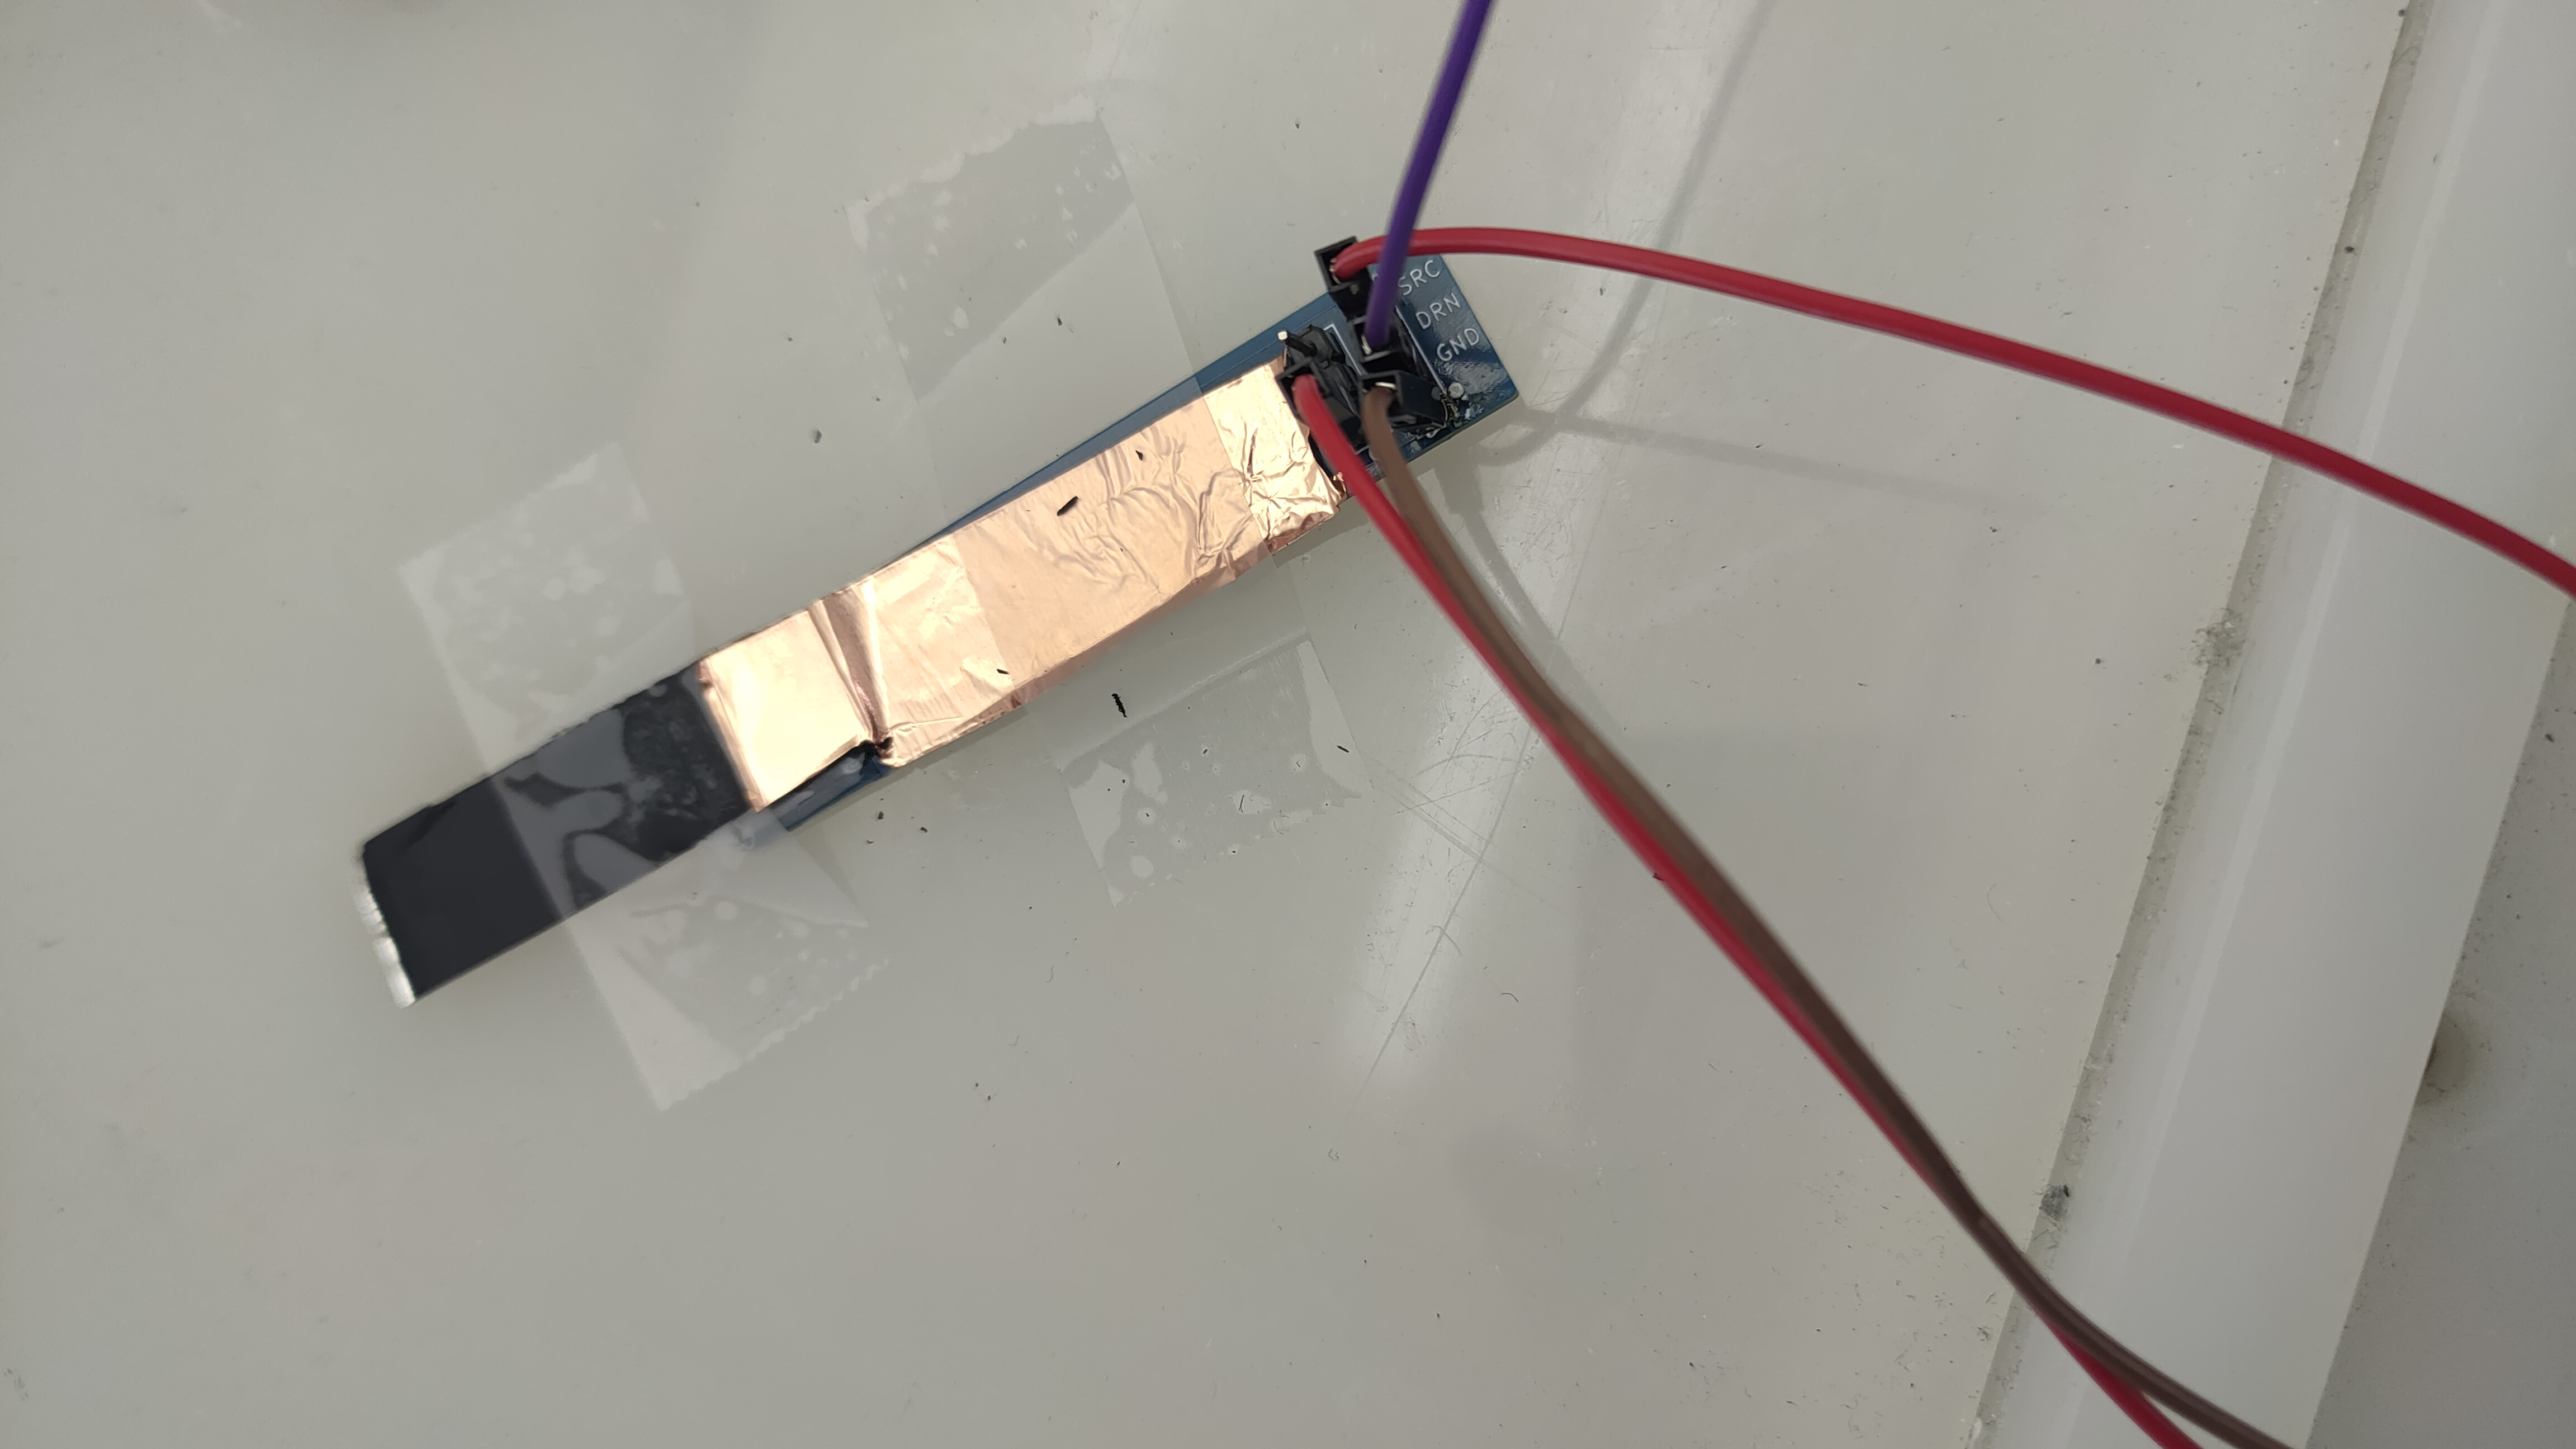

# 14-06-24 LiTaO3 gating

- Scan: linear dual
- start: 0V
- Stop: 3V
(We would have been switching cathode and anode)
- No. of points: 100

No electrolysis occurred due to lack of EDL. However, solution turned yellow a tiny bit (shown below).


# Base Time
06/12/2024 15:30:22

In [ ]:
%cd "/content/gator/data/06-12"

/content/gator/data/06-12


In [ ]:
df = pd.read_csv('defbuffer1_0612_153149.csv')


In [ ]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-7.027003e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.000044,Volt DC,10,T,2W,F,F,0.000000
1,1.646707e-08,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.030521,Volt DC,10,T,2W,F,F,0.761221
2,4.394765e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.060654,Volt DC,10,T,2W,F,F,0.845403
3,6.157799e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.090991,Volt DC,10,T,2W,F,F,0.929539
4,7.347849e-07,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.121222,Volt DC,10,T,2W,F,F,1.013701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,-3.840199e-06,Amp DC,1.000000e-05,5.5,F,F,F,F,F,F,...,F,Main,0.121120,Volt DC,10,T,2W,F,F,47.719581
593,-4.617204e-06,Amp DC,1.000000e-05,5.5,F,F,F,F,F,F,...,F,Main,0.090908,Volt DC,10,T,2W,F,F,47.789005
594,-5.442543e-06,Amp DC,1.000000e-05,5.5,F,F,F,F,F,F,...,F,Main,0.060600,Volt DC,10,T,2W,F,F,47.858432
595,-6.287626e-06,Amp DC,1.000000e-05,5.5,F,F,F,F,F,F,...,F,Main,0.030688,Volt DC,10,T,2W,F,F,47.927852


In [ ]:
# Time (s)
T = df['Relative Time']

# Current (mA)
I = df['Reading'] * 1e3

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Potential (s)')

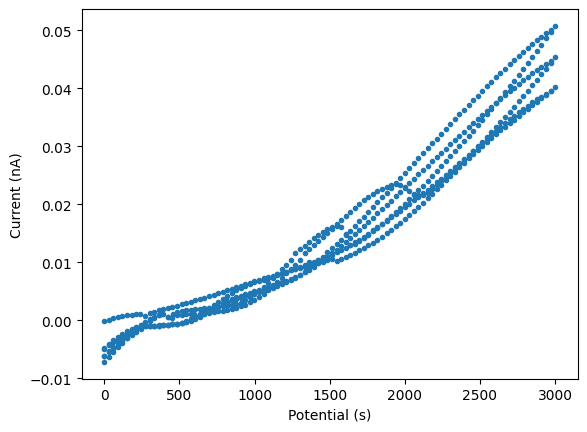

In [ ]:
cut1 = 0
cut2 = len(V)
plt.plot(V[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Potential (s)')

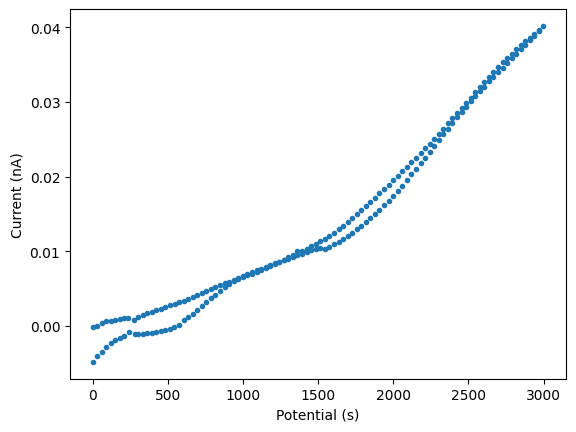

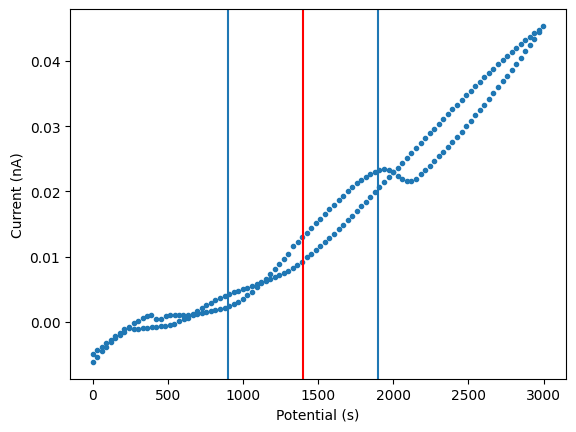

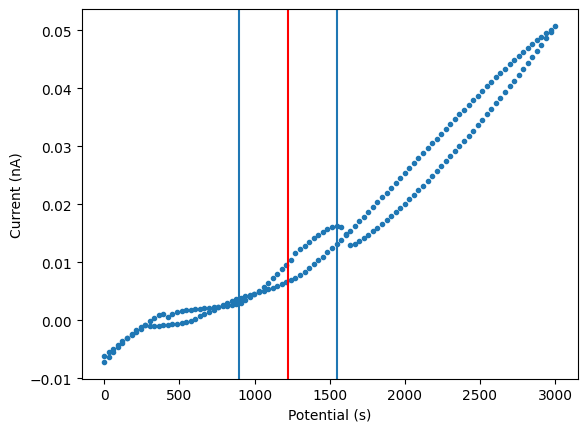

In [ ]:
# prompt: 可以吧三次的结果分卡给我展示吗

cut1 = 0
cut2 = len(V) // 3
cut3 = len(V) * 2 // 3
plt.plot(V[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Potential (s)')

plt.figure()
plt.plot(V[cut2:cut3],I[cut2:cut3],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Potential (s)')
plt.axvline(1900)
plt.axvline(900)
plt.axvline(1400,color='r')

plt.figure()
plt.plot(V[cut3:],I[cut3:],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Potential (s)')
plt.axvline(900)
plt.axvline(1550)
plt.axvline(1225,color='r')